In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import datetime 

## Data preparation

In [71]:
df = pd.read_csv('../data/samples/sample.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,13979008,3696,https://www.zameen.com/Property/chinar_bagh_ch...,House,13000000,Chinar Bagh,Lahore,Punjab,31.321454,74.239497,0,1 Kanal,For Sale,6,01-03-2019,Niazi Real Estate & Marketing,Agha Mansoor Ali Khan Niazi,Kanal,1.0,1-5 Kanal
1,14053499,1451,https://www.zameen.com/Property/dha_defence_dh...,House,46000000,DHA Defence,Lahore,Punjab,31.494408,74.437666,7,1 Kanal,For Sale,6,01-03-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
2,14117380,756,https://www.zameen.com/Property/lahore_bor_boa...,House,7500000,BOR - Board of Revenue Housing Society,Lahore,Punjab,31.478452,74.296846,4,3 Marla,For Sale,4,01-03-2019,NaN,NaN,Marla,3.0,0-5 Marla
3,14052338,69,https://www.zameen.com/Property/lahore_cavalry...,House,12500000,Cavalry Ground,Lahore,Punjab,31.492705,74.367093,3,5 Marla,For Sale,3,01-03-2019,NaN,NaN,Marla,5.0,0-5 Marla
4,14034663,1553,https://www.zameen.com/Property/model_town_mod...,House,65000000,Model Town,Lahore,Punjab,31.476915,74.324641,0,1 Kanal,For Sale,4,01-03-2019,NaN,NaN,Kanal,1.0,1-5 Kanal


In [72]:
df = df[df['latitude'] > 22][df['latitude'] < 38]
df = df[df['longitude'] > 59][df['longitude'] < 79]

/tmp/ipykernel_46970/48595217.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['longitude'] > 59][df['longitude'] < 79]


In [73]:
area_marla = np.where(df['Area Type'] == 'Kanal', df['Area Size'] * 20, df['Area Size'])
df['area'] = area_marla

df['day'] = df['date_added'].apply(lambda x: int(x.split('-')[1]))
df['month'] = df['date_added'].apply(lambda x: int(x.split('-')[0]))
df['year'] = df['date_added'].apply(lambda x: int(x.split('-')[2]))

df = df.drop(['Area Type', 'Area Size', 'Area Category', 'agency', 'agent', 'property_id', 'page_url', 'date_added'], axis=1)

df

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,day,month,year
0,3696,House,13000000,Chinar Bagh,Lahore,Punjab,31.321454,74.239497,0,20.0,For Sale,6,3,1,2019
1,1451,House,46000000,DHA Defence,Lahore,Punjab,31.494408,74.437666,7,20.0,For Sale,6,3,1,2019
2,756,House,7500000,BOR - Board of Revenue Housing Society,Lahore,Punjab,31.478452,74.296846,4,3.0,For Sale,4,3,1,2019
3,69,House,12500000,Cavalry Ground,Lahore,Punjab,31.492705,74.367093,3,5.0,For Sale,3,3,1,2019
4,1553,House,65000000,Model Town,Lahore,Punjab,31.476915,74.324641,0,20.0,For Sale,4,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33684,1483,House,60000000,DHA Defence,Karachi,Sindh,24.805045,67.064323,4,12.0,For Sale,4,6,5,2019
33685,1482,House,46000000,DHA Defence,Karachi,Sindh,24.810265,67.043552,4,10.0,For Sale,4,6,5,2019
33686,1483,House,52500000,DHA Defence,Karachi,Sindh,24.805045,67.064323,4,12.0,For Sale,4,6,5,2019
33687,1483,House,65000000,DHA Defence,Karachi,Sindh,24.805045,67.064323,4,12.0,For Sale,4,6,5,2019


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'], random_state=42)
X_train

,location_id,property_type,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,day,month,year
8597,10011,House,Bahria Town Karachi,Karachi,Sindh,25.005301,67.308810,0,8.0,For Sale,3,17,2,2019
2701,3069,Lower Portion,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.495991,73.100195,0,7.0,For Rent,0,6,1,2019
32348,6825,House,Gulistan-e-Jauhar,Karachi,Sindh,24.929719,67.130363,8,9.6,For Sale,8,6,5,2019
26231,487,House,State Life Housing Society,Lahore,Punjab,31.445580,74.401217,3,5.0,For Sale,3,4,5,2019
20258,6760,House,Gadap Town,Karachi,Sindh,25.022481,67.129082,5,16.0,For Sale,3,6,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,4164,House,Sabzazar Scheme,Lahore,Punjab,31.521557,74.261012,4,5.0,For Sale,3,4,4,2019
6265,160,House,D-12,Islamabad,Islamabad Capital,33.701636,72.948532,5,5.0,For Sale,4,4,2,2019
11285,3332,Flat,G-11,Islamabad,Islamabad Capital,33.675604,73.000367,3,3.1,For Rent,2,6,3,2019
860,339,Flat,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,2,3.6,For Sale,2,5,1,2019


In [75]:
def one_hot_encode_feature(X_train, X_test, column_name): 
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[[column_name]])

    train_encoded_df = pd.DataFrame(ohe.transform(X_train[[column_name]]), columns=ohe.get_feature_names_out([column_name]))
    test_encoded_df = pd.DataFrame(ohe.transform(X_test[[column_name]]), columns=ohe.get_feature_names_out([column_name]))

    X_train = X_train.drop(column_name, axis=1)
    X_test = X_test.drop(column_name, axis=1)

    X_train = X_train.reset_index(drop=True)
    train_encoded_df = train_encoded_df.reset_index(drop=True)

    X_test = X_test.reset_index(drop=True)
    test_encoded_df = test_encoded_df.reset_index(drop=True)

    X_train = pd.concat([X_train, train_encoded_df], axis=1)
    X_test = pd.concat([X_test, test_encoded_df], axis=1)

    return X_train, X_test
    
def scale_feature(X_train, X_test, column_name, strategy='std'): 
    scalers = {
        'std': StandardScaler, 
        'minmax': MinMaxScaler
    }
    if strategy not in scalers: 
        raise NotImplementedError(f'Scaling is not implemented for {strategy}')

    scaler = scalers[strategy]().fit(X_train[[column_name]])

    X_train[column_name] = scaler.transform(X_train[[column_name]])
    X_test[column_name] = scaler.transform(X_test[[column_name]])
    return X_train, X_test
    

X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'], random_state=42)

X_train, X_test = one_hot_encode_feature(X_train, X_test, 'property_type')
X_train, X_test = one_hot_encode_feature(X_train, X_test, 'location')
X_train, X_test = one_hot_encode_feature(X_train, X_test, 'city')
X_train, X_test = one_hot_encode_feature(X_train, X_test, 'province_name')
X_train, X_test = one_hot_encode_feature(X_train, X_test, 'purpose')

X_train, X_test = scale_feature(X_train, X_test, 'latitude', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'longitude', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'area')
X_train, X_test = scale_feature(X_train, X_test, 'location_id', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'baths')
X_train, X_test = scale_feature(X_train, X_test, 'bedrooms')
X_train, X_test = scale_feature(X_train, X_test, 'day', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'month', strategy='minmax')
X_train, X_test = scale_feature(X_train, X_test, 'year', strategy='minmax')

X_train


,location_id,latitude,longitude,baths,area,bedrooms,day,month,year,property_type_Farm House,...,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh,purpose_For Rent,purpose_For Sale
0,0.725678,0.028232,0.060959,-1.315872,-0.040372,-0.091098,0.842105,0.25,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.222416,0.965035,0.817295,-1.315872,-0.048885,-1.542961,0.263158,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.494708,0.019892,0.037654,2.191176,-0.026750,2.328673,0.263158,1.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.035233,0.738807,0.987204,-0.000729,-0.065913,-0.091098,0.157895,1.00,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.489996,0.030127,0.037487,0.876033,0.027737,-0.091098,0.263158,0.75,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25261,0.301798,0.747190,0.968894,0.437652,-0.065913,-0.091098,0.157895,0.75,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
25262,0.011527,0.987725,0.797488,0.876033,-0.065913,0.392856,0.157895,0.25,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
25263,0.241482,0.984853,0.804258,-0.000729,-0.082088,-0.575052,0.263158,0.50,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25264,0.024503,0.968561,0.825287,-0.439110,-0.077832,-0.575052,0.210526,0.00,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Model training

In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from time import time 

In [78]:
model = Lasso()

In [79]:
train_time_start = time()
model.fit(X_train, y_train)
train_time_end = time()

/home/pc/Documents/Innopolis/Sum24/MLOps/Project/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+19, tolerance: 4.140e+15
  model = cd_fast.enet_coordinate_descent(


In [81]:
inference_time_start = time()
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
inference_time_end = time() 

train_r2, test_r2 = r2_score(y_train, predictions_train), r2_score(y_test, predictions_test)

In [82]:
print("Lasso")
print(f'\tTraining time:  {train_time_end - train_time_start}')
print(f'\tInference time: {inference_time_end - inference_time_start}')
print(f'\tTraining r2:    {train_r2}')
print(f'\tTesting r2:     {test_r2}')
print()

Lasso
	Training time:  105.9167652130127
	Inference time: 0.10936379432678223
	Training r2:    0.3605665741522316
	Testing r2:     0.30407011317643307



## Residuals

In [42]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted data')

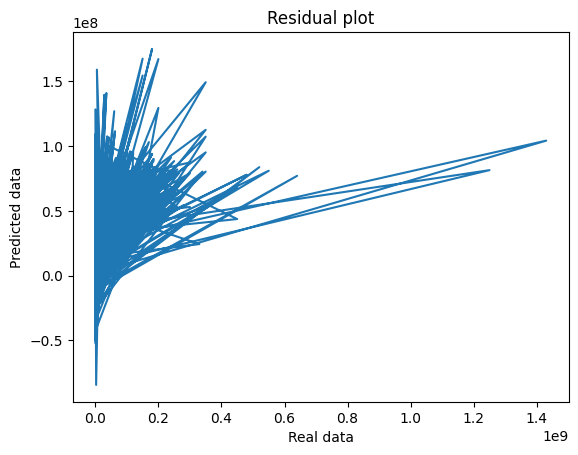

In [43]:
plt.plot(y_test, predictions_test)
plt.title("Residual plot")
plt.xlabel("Real data")
plt.ylabel("Predicted data")

## Analysis

As we can see from POC model the task can be solved by the classical ml methods, but we must pay attention to the residuals (we can see it on the plot).